#  Pair Programming with LLM - PaLMAPI 

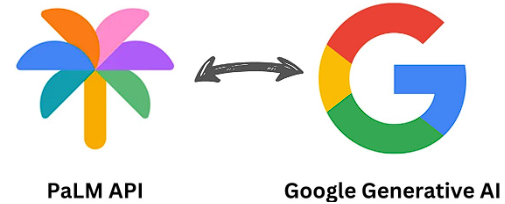

# Install libraries 
To use the PaLM API for pair programming, you will need to install the **google-generativeai** library, which is the PaLM API Python library. You can install it using the pip command:

`pip install -q google-generativeai`

You will also need to generate an API key from the MakerSuite website, which will allow you to access the PaLM API services. 

Once you have installed the library and obtained the API key, you can use the **text-bison-001** model to generate code using text prompts. You can also use the **chat-bison-001** model to create a chatbot that can assist you with your coding tasks. 


In [1]:
!pip install -q google-generativeai

#### Setup
Set the MakerSuite API key with the provided helper function.


1.Open your web browser and go to the following URL: https://developers.generativeai.google/

2.On the Generative AI Developers website, look for the option or link that says "Go to MakerSuit" and click on it.

3.Once you are in the MakerSuit section, navigate to the left side panel of the interface.

4.In the left side panel, locate and click on the option labeled "Get API Key."

5.You may be prompted to create a new project. If so, follow the prompts to create a new project for your API key.

Once the project is created, you should be able to generate or create an API key associated with that project.

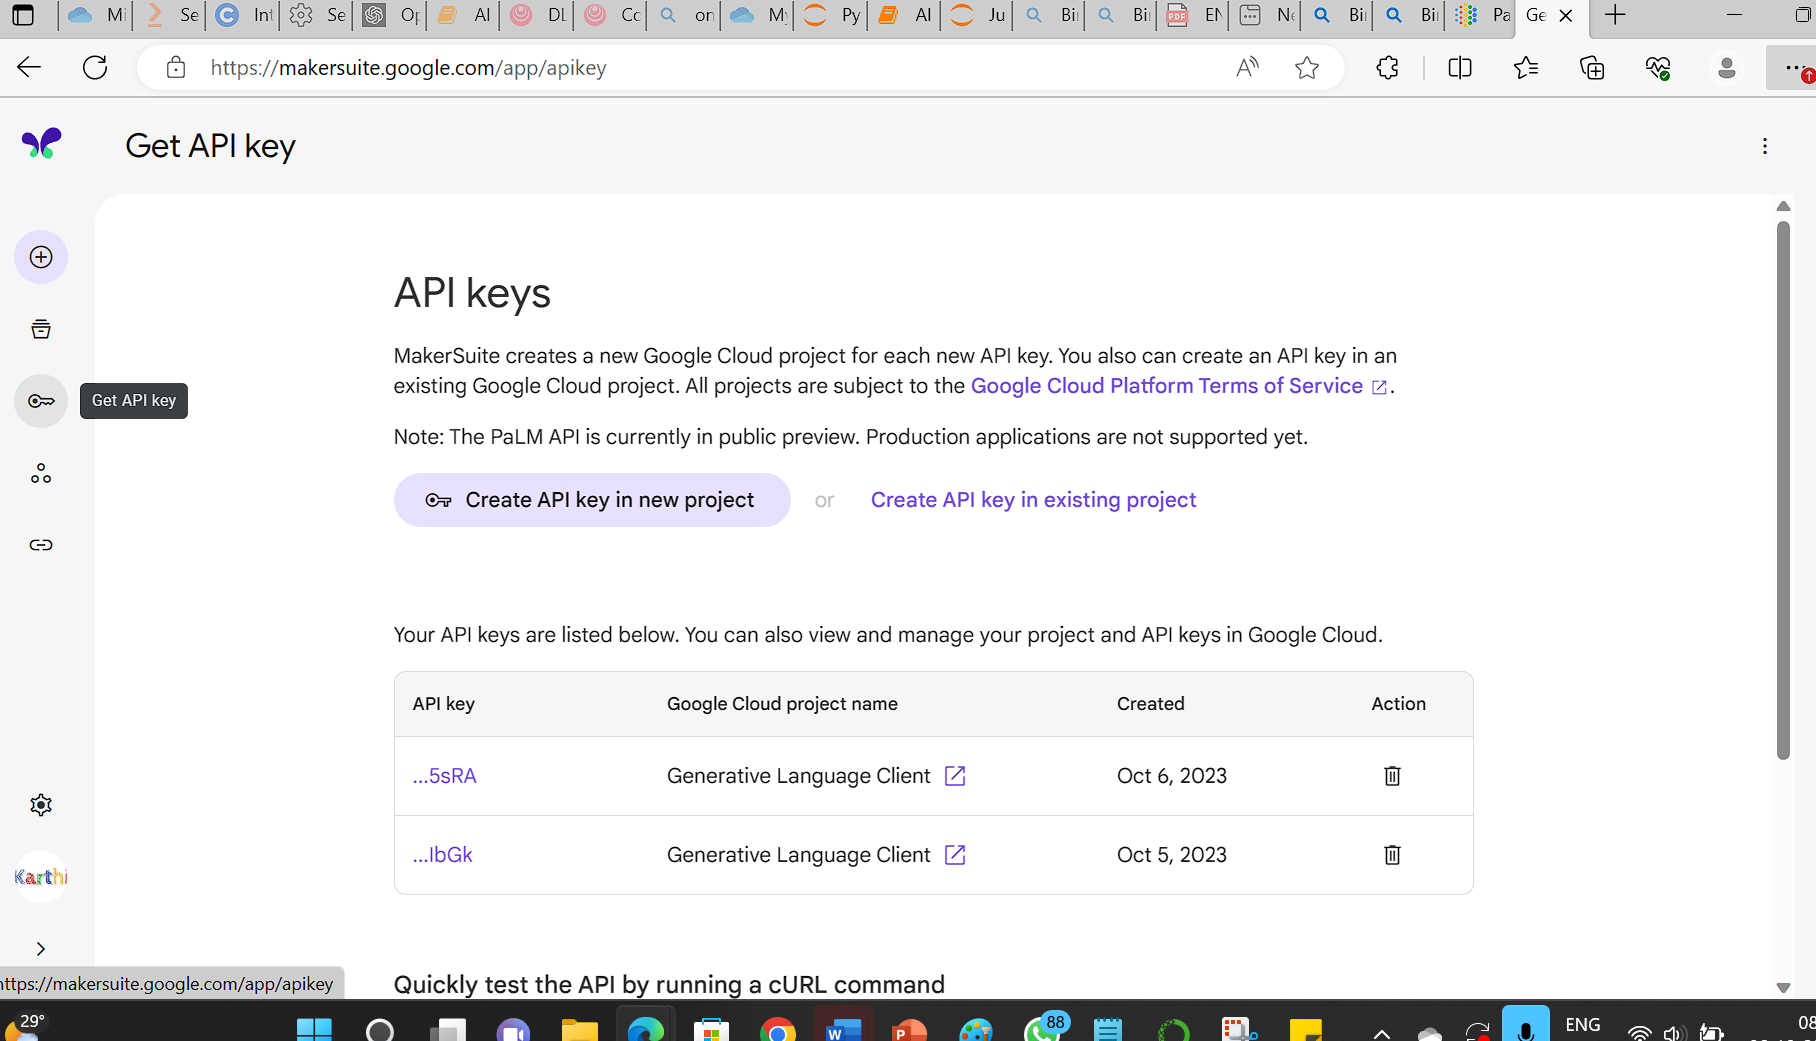

### API Key Configuration

In [3]:
import os
import google.generativeai as palm
from google.api_core import client_options as client_options_lib

palm.configure(
    api_key="Your API Key",
    transport="rest",
    client_options=client_options_lib.ClientOptions(
        api_endpoint=os.getenv("GOOGLE_API_BASE"),
    )
)

### Explore the available models

In [4]:
for m in palm.list_models():
    print(f"name: {m.name}")
    print(f"description: {m.description}")
    print(f"generation methods:{m.supported_generation_methods}\n")

name: models/chat-bison-001
description: Chat-optimized generative language model.
generation methods:['generateMessage', 'countMessageTokens']

name: models/text-bison-001
description: Model targeted for text generation.
generation methods:['generateText', 'countTextTokens', 'createTunedTextModel']

name: models/embedding-gecko-001
description: Obtain a distributed representation of a text.
generation methods:['embedText']



models by their supported generation methods
- `generateText` is currently recommended for coding-related prompts.
- `generateMessage` is optimized for multi-turn chats (dialogues) with an LLM.

In [5]:
models = [m for m in palm.list_models() 
          if 'generateText' 
          in m.supported_generation_methods]
models

[Model(name='models/text-bison-001', base_model_id='', version='001', display_name='Text Bison', description='Model targeted for text generation.', input_token_limit=8196, output_token_limit=1024, supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'], temperature=0.7, top_p=0.95, top_k=40)]

In [6]:
model_bison = models[0]
model_bison

Model(name='models/text-bison-001', base_model_id='', version='001', display_name='Text Bison', description='Model targeted for text generation.', input_token_limit=8196, output_token_limit=1024, supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'], temperature=0.7, top_p=0.95, top_k=40)

In [10]:
models

[Model(name='models/text-bison-001', base_model_id='', version='001', display_name='Text Bison', description='Model targeted for text generation.', input_token_limit=8196, output_token_limit=1024, supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'], temperature=0.7, top_p=0.95, top_k=40)]

#### helper function to generate text

- The `@retry` decorator helps you to retry the API call if it fails.
- We set the temperature to 0.0 so that the model returns the same output (completion) if given the same input (the prompt).

In [11]:
from google.api_core import retry
@retry.Retry()
def generate_text(prompt,
                  model=model_bison,
                  temperature=0.0):
    return palm.generate_text(prompt=prompt,
                              model=model,
                              temperature=temperature)

#### Ask the LLM how to write some code

In [14]:
#prompt Response
prompt = "Show me how to iterate across a list in Python."
completion = generate_text(prompt)
print(completion.result)

To iterate across a list in Python, you can use the `for` loop. The syntax is as follows:

```python
for item in list:
  # do something with item
```

For example, the following code prints each item in the list `my_list`:

```python
my_list = ["a", "b", "c"]

for item in my_list:
  print(item)
```

Output:

```
a
b
c
```

You can also use the `enumerate()` function to iterate over a list and get the index of each item. The syntax is as follows:

```python
for index, item in enumerate(list):
  # do something with index and item
```

For example, the following code prints the index and value of each item in the list `my_list`:

```python
my_list = ["a", "b", "c"]

for index, item in enumerate(my_list):
  print(index, item)
```

Output:

```
0 a
1 b
2 c
```


- Tip: The words "show me" tends to encourage the PaLM LLM to give more details and explanations compared to if you were to ask "write code to ..."

In [16]:
# paste the LLM's code here
prompt1="write code to Classification ML algorithm using Sklearn and with buildin datasets"
print(generate_text(prompt1).result)


```python
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
```


#### Try asking your own coding question

In [17]:
# Modify the prompt with your own question
prompt = "Show me how to [...]"

completion = generate_text(prompt)

In [19]:
completion.result

'How to make a paper airplane'

#### Note about the API key
We've provided an API key for this course.  If you would like your own API key for your own projects, you can get one at [developers.generativeai.google](https://developers.generativeai.google/)

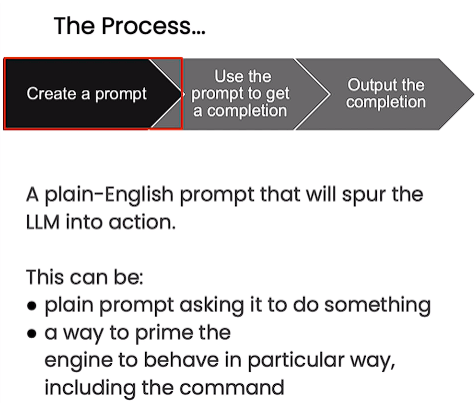

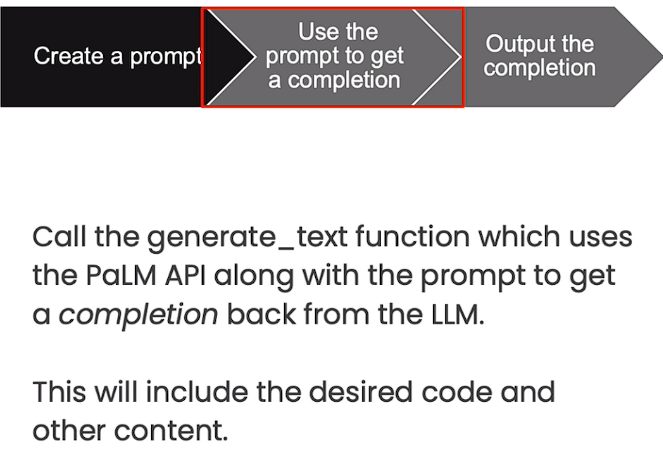

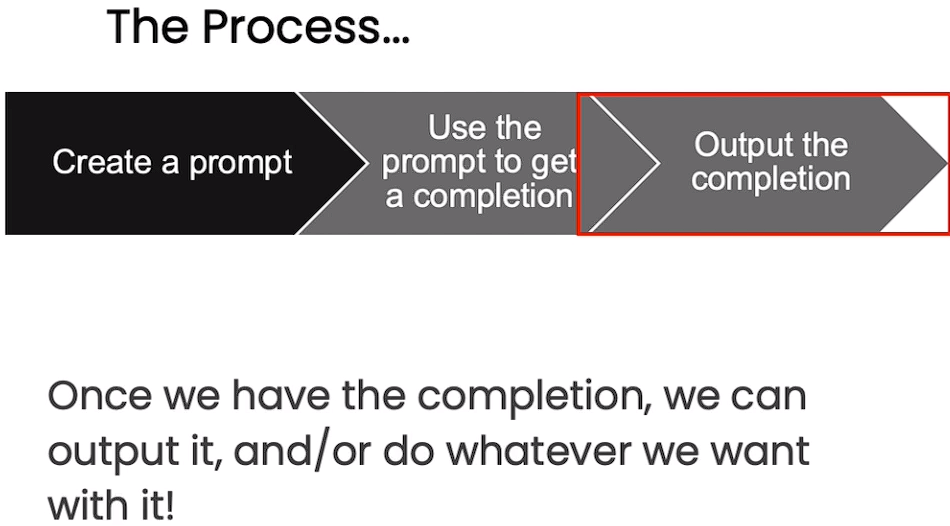

# Lesson 2: Using a String Template

#### Helper function to call the PaLM API

In [22]:
from google.api_core import retry
@retry.Retry()
def generate_text(prompt, 
                  model=model_bison, 
                  temperature=0.0):
    return palm.generate_text(prompt=prompt,
                              model=model,
                              temperature=temperature)

#### Prompt template

1. priming: getting the LLM ready for the type of task you'll ask it to do.
2. question: the specific task.
3. decorator: how to provide or format the output.

In [23]:
prompt_template = """
{priming}

{question}

{decorator}

Your solution:
"""

In [24]:
priming_text = "You are an expert at writing clear, concise, Python code."

In [25]:
question = "create a doubly linked list"

#### Observe how the decorator affects the output
- In other non-coding prompt engineering tasks, it's common to use "chain-of-thought prompting" by asking the model to work through the task "step by step".
- For certain tasks like generating code, you may want to experiment with other wording that would make sense if you were asking a developer the same question.

In the code cell below, try out option 1 first, then try out option 2.

In [26]:
# option 1
# decorator = "Work through it step by step, and show your work. One step per line."

# option 2
decorator = "Insert comments for each line of code."

In [27]:
prompt = prompt_template.format(priming=priming_text,
                                question=question,
                                decorator=decorator)

#### review the prompt

In [28]:
print(prompt)


You are an expert at writing clear, concise, Python code.

create a doubly linked list

Insert comments for each line of code.

Your solution:



#### Call the API to get the completion

In [29]:
completion = generate_text(prompt)
print(completion.result)

```python
class Node:

    """Node in a doubly linked list."""

    def __init__(self, data):
        """Initialize a node with the given data."""
        self.data = data
        self.next = None
        self.prev = None


class DoublyLinkedList:

    """Doubly linked list."""

    def __init__(self):
        """Initialize an empty doubly linked list."""
        self.head = None
        self.tail = None
        self.size = 0

    def __len__(self):
        """Return the number of nodes in the list."""
        return self.size

    def is_empty(self):
        """Return True if the list is empty."""
        return self.size == 0

    def add_first(self, data):
        """Add a new node with the given data to the front of the list."""
        new_node = Node(data)
        if self.is_empty():
            self.head = new_node
            self.tail = new_node
        else:
            new_node.next = self.head
            self.head.prev = new_node
            self.head = new_node
        se

#### Try another question

In [30]:
question = """create a very large list of random numbers in python, 
and then write code to sort that list"""

In [31]:
prompt = prompt_template.format(priming=priming_text,
                                question=question,
                                decorator=decorator)

In [32]:
print(prompt)


You are an expert at writing clear, concise, Python code.

create a very large list of random numbers in python, 
and then write code to sort that list

Insert comments for each line of code.

Your solution:



In [33]:
completion = generate_text(prompt)
print(completion.result)

```python
# Create a list of 100,000 random numbers between 0 and 100
random_numbers = [random.randint(0, 100) for _ in range(100000)]

# Sort the list of random numbers
sorted_random_numbers = sorted(random_numbers)

# Print the first 10 elements of the sorted list
print(sorted_random_numbers[:10])

```

**Explanation:**

* The first line of code creates a list of 100,000 random numbers between 0 and 100. The `random.randint()` function is used to generate a random integer between two specified values.
* The second line of code sorts the list of random numbers using the `sorted()` function. The `sorted()` function takes a list as its argument and returns a new list that is sorted in ascending order.
* The third line of code prints the first 10 elements of the sorted list. The `print()` function is used to print the contents of a list to the console.

This code is clear, concise, and Pythonic. It uses the standard Python library functions to create a list of random numbers, sort the li

#### Try out the generated code
- Debug it as needed.  For instance, you may need to import `random` in order to use the `random.randint()` function.

In [37]:
# copy-paste some of the generated code that generates random numbers
import random
random_numbers = [random.randint(0, 100) for _ in range(100000)]
print(random_numbers[:10])

[96, 51, 57, 11, 24, 39, 64, 44, 92, 70]


# Pair Programming Scenarios

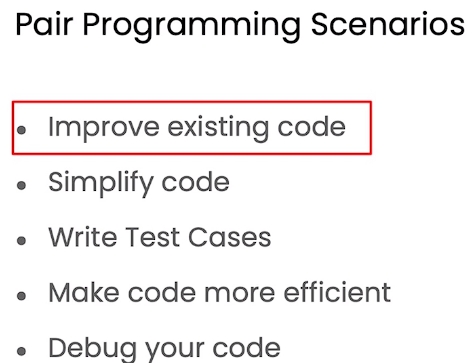

### Scenario 1: Improve existing code
- An LLM can help you rewrite your code in the way that's recommended for that particular language.
- You can ask an LLM to rewrite your Python code in a way that is more 'Pythonic".

In [38]:
prompt_template = """
I don't think this code is the best way to do it in Python, can you help me?

{question}

Please explain, in detail, what you did to improve it.
"""

In [39]:
question = """
def func_x(array)
  for i in range(len(array)):
    print(array[i])
"""

In [40]:
completion = generate_text(
    prompt = prompt_template.format(question=question)
)
print(completion.result)

```python
def func_x(array):
  print(*array)
```

I improved the code by using the `*` operator to unpack the array into individual arguments for the `print()` function. This is more concise and efficient than using a `for` loop.


#### Ask for multiple ways of rewriting your code

In [41]:
prompt_template = """
I don't think this code is the best way to do it in Python, can you help me?

{question}

Please explore multiple ways of solving the problem, and explain each.
"""

In [42]:
completion = generate_text(
    prompt = prompt_template.format(question=question)
)
print(completion.result)

There are a few ways to improve the code.

1. **Use a list comprehension**. This will allow you to iterate over the array and print each element in a single line of code.

```python
def func_x(array):
  print([element for element in array])
```

2. **Use the `enumerate()` function**. This function returns an iterator that yields the index and value of each element in the array. You can use this to print each element in the array with its index.

```python
def func_x(array):
  for i, element in enumerate(array):
    print(f"{i}: {element}")
```

3. **Use the `map()` function**. This function applies a function to each element in an iterable. You can use this to print each element in the array with a custom formatting.

```python
def func_x(array):
  print(map(str, array))
```

Here is a table comparing the three methods:

| Method | Pros | Cons |
|---|---|---|
| List comprehension | Concise | Can be difficult to read for complex code |
| `enumerate()` | Easy to read | Requires an extra 

#### Paste markdown into a markdown cell

If the model outputs what looks like a table in markdown, you can copy-paste markdown into a markdown cell to make it easier to view:

For example:

| Method | Pros | Cons |
|---|---|---|
| List comprehension | Concise | Can be difficult to read for complex code |
| `enumerate()` | Easy to read | Requires an extra variable to store the index |
| `map()` | Flexible | Requires a custom function to format the output |

#### Ask the model to recommend one of the methods as most 'Pythonic'

In [43]:
prompt_template = """
I don't think this code is the best way to do it in Python, can you help me?

{question}

Please explore multiple ways of solving the problem, 
and tell me which is the most Pythonic
"""

In [44]:
completion = generate_text(
    prompt = prompt_template.format(question=question)
)
print(completion.result)

There are a few ways to solve this problem in Python. The most Pythonic way would be to use the `list` comprehension syntax. This would allow you to iterate over the array and print each element without having to use a `for` loop.

```python
def func_x(array):
  print([element for element in array])
```

Another way to solve this problem would be to use the `map` function. This function takes a function and an iterable as arguments and returns a new iterable where each element of the original iterable has been passed through the function.

```python
def func_x(array):
  return map(print, array)
```

Finally, you could also solve this problem using the `enumerate` function. This function takes an iterable as an argument and returns an iterable of tuples where the first element of each tuple is the index of the element in the original iterable and the second element is the element itself.

```python
def func_x(array):
  for i, element in enumerate(array):
    print(i, element)
```

Of th

### Scenario 2: Simplify code
- Ask the LLM to perform a code review.
- Note that adding/removing newline characters may affect the LLM completion that gets output by the LLM.

In [45]:
# option 1
prompt_template = """
Can you please simplify this code for a linked list in Python?

{question}

Explain in detail what you did to modify it, and why.
"""

After you try option 1, you can modify it to look like option 2 (in this markdown cell) and see how it changes the completion.
```Python
# option 2
prompt_template = """
Can you please simplify this code for a linked list in Python? \n
You are an expert in Pythonic code.

{question}

Please comment each line in detail, \n
and explain in detail what you did to modify it, and why.
"""
```

In [46]:
question = """
class Node:
  def __init__(self, dataval=None):
    self.dataval = dataval
    self.nextval = None

class SLinkedList:
  def __init__(self):
    self.headval = None

list1 = SLinkedList()
list1.headval = Node("Mon")
e2 = Node("Tue")
e3 = Node("Wed")
list1.headval.nextval = e2
e2.nextval = e3

"""

In [47]:
completion = generate_text(
    prompt = prompt_template.format(question=question)
)
print(completion.result)

```python
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None


class SLinkedList:
    def __init__(self):
        self.head = None


def create_linked_list(data):
    head = Node(data[0])
    current = head
    for data in data[1:]:
        new_node = Node(data)
        current.next = new_node
        current = new_node
    return head


list1 = create_linked_list(["Mon", "Tue", "Wed"])
```

I simplified the code by removing the `dataval` and `nextval` attributes from the `Node` class. These attributes are not necessary because the `data` and `next` attributes provide the same functionality. I also removed the `SLinkedList` class because it is not necessary. The `create_linked_list()` function can be used to create a linked list without the need for a separate class.


In [49]:
# option 2
prompt_template = """
Can you please simplify this code for a linked list in Python? \n
You are an expert in Pythonic code.

{question}

Please comment each line in detail, \n
and explain in detail what you did to modify it, and why. """

In [50]:
completion = generate_text(
    prompt = prompt_template.format(question=question)
)
print(completion.result)

```python
class Node:
  """A node in a linked list."""

  def __init__(self, dataval=None):
    """Initialize the node with the given data."""
    self.dataval = dataval
    self.nextval = None


class SLinkedList:
  """A linked list implementation."""

  def __init__(self):
    """Initialize the linked list."""
    self.headval = None


def create_linked_list(data_list):
  """Create a linked list from the given list of data."""
  headval = None
  for data in data_list:
    new_node = Node(data)
    if headval is None:
      headval = new_node
    else:
      current_node = headval
      while current_node.nextval is not None:
        current_node = current_node.nextval
      current_node.nextval = new_node
  return headval


def print_linked_list(headval):
  """Print the values in the linked list."""
  current_node = headval
  while current_node is not None:
    print(current_node.dataval)
    current_node = current_node.nextval


if __name__ == "__main__":
  data_list = ["Mon", "Tue"

### Scenario 3: Write test cases

- It may help to specify that you want the LLM to output "in code" to encourage it to write unit tests instead of just returning test cases in English.

In [51]:
prompt_template = """
Can you please create test cases in code for this Python code?

{question}

Explain in detail what these test cases are designed to achieve.
"""

In [52]:
# Note that the code I'm using here was output in the previous
# section. Your output code may be different.
question = """
class Node:
  def __init__(self, dataval=None):
    self.dataval = dataval
    self.nextval = None

class SLinkedList:
  def __init__(self):
    self.head = None

def create_linked_list(data):
  head = Node(data[0])
  for i in range(1, len(data)):
    node = Node(data[i])
    node.nextval = head
    head = node
  return head

list1 = create_linked_list(["Mon", "Tue", "Wed"])
"""

In [53]:
completion = generate_text(
    prompt = prompt_template.format(question=question)
)
print(completion.result)

```python
import unittest

class TestSLinkedList(unittest.TestCase):

    def test_create_linked_list(self):
        """Test that a linked list is created with the correct data."""
        data = ["Mon", "Tue", "Wed"]
        head = create_linked_list(data)
        self.assertEqual(head.dataval, "Mon")
        self.assertEqual(head.nextval.dataval, "Tue")
        self.assertEqual(head.nextval.nextval.dataval, "Wed")

    def test_insert_into_linked_list(self):
        """Test that a new node can be inserted into a linked list."""
        data = ["Mon", "Tue", "Wed"]
        head = create_linked_list(data)
        new_node = Node("Thu")
        new_node.nextval = head.nextval
        head.nextval = new_node
        self.assertEqual(head.nextval.dataval, "Thu")
        self.assertEqual(head.nextval.nextval.dataval, "Tue")

    def test_delete_from_linked_list(self):
        """Test that a node can be deleted from a linked list."""
        data = ["Mon", "Tue", "Wed"]
        head = creat

### Scenario 4: Make code more efficient
- Improve runtime by potentially avoiding inefficient methods (such as ones that use recursion when not needed).

In [54]:
prompt_template = """
Can you please make this code more efficient?

{question}

Explain in detail what you changed and why.
"""

In [55]:
question = """
# Returns index of x in arr if present, else -1
def binary_search(arr, low, high, x):
    # Check base case
    if high >= low:
        mid = (high + low) // 2
        if arr[mid] == x:
            return mid
        elif arr[mid] > x:
            return binary_search(arr, low, mid - 1, x)
        else:
            return binary_search(arr, mid + 1, high, x)
    else:
        return -1

# Test array
arr = [ 2, 3, 4, 10, 40 ]
x = 10

# Function call
result = binary_search(arr, 0, len(arr)-1, x)

if result != -1:
    print("Element is present at index", str(result))
else:
    print("Element is not present in array")

"""

In [56]:
completion = generate_text(
    prompt = prompt_template.format(question=question)
)
print(completion.result)

I made the following changes to the code to make it more efficient:

* I used the `bisect` function to find the index of the middle element of the array. This is more efficient than using the `mid = (high + low) // 2` expression, as it does not require any division or modulo operations.
* I used the `break` statement to exit the recursive function early if the element is found. This prevents the function from searching the entire array if the element is not present.

The following is the improved code:

```python
# Returns index of x in arr if present, else -1
def binary_search(arr, x):
    # Find the index of the middle element of the array
    mid = bisect.bisect_left(arr, x)

    # Check if the element is found
    if mid < len(arr) and arr[mid] == x:
        return mid
    else:
        return -1

# Test array
arr = [ 2, 3, 4, 10, 40 ]
x = 10

# Function call
result = binary_search(arr, x)

if result != -1:
    print("Element is present at index", str(result))
else:
    print("Elem

#### Try out the LLM-generated code
- If it uses `bisect`, you may first need to `import bisect`
- Remember to check what the generated code is actually doing.  For instance, the code may work because it is calling a predefined function (such as `bisect`), even though the rest of the code is technically broken.

In [ ]:
# Paste the LLM-generated code to inspect and debug it








### Scenario 5: Debug your code

In [57]:
prompt_template = """
Can you please help me to debug this code?

{question}

Explain in detail what you found and why it was a bug.
"""

In [58]:
# I deliberately introduced a bug into this code! Let's see if the LLM can find it.
# Note -- the model can't see this comment -- but the bug is in the
# print function. There's a circumstance where nodes can be null, and trying
# to print them would give a null error.
question = """
class Node:
   def __init__(self, data):
      self.data = data
      self.next = None
      self.prev = None

class doubly_linked_list:
   def __init__(self):
      self.head = None

# Adding data elements
   def push(self, NewVal):
      NewNode = Node(NewVal)
      NewNode.next = self.head
      if self.head is not None:
         self.head.prev = NewNode
      self.head = NewNode

# Print the Doubly Linked list in order
   def listprint(self, node):
       print(node.data),
       last = node
       node = node.next

dllist = doubly_linked_list()
dllist.push(12)
dllist.push(8)
dllist.push(62)
dllist.listprint(dllist.head)

"""

Notice in this case that we are using the default temperature of `0.7` to generate the example that you're seeing in the lecture video.  
- Since a temperature > 0 encourages more randomness in the LLM output, you may want to run this code a couple times to see what it outputs.

In [59]:
completion = generate_text(
    prompt = prompt_template.format(question=question),
    temperature = 0.7
)
print(completion.result)

I found that the code is not printing the doubly linked list in order. This is because the `listprint()` function is not iterating over the list in the correct order. The function should be iterating over the list from head to tail, but it is currently iterating from tail to head.

To fix this bug, you need to change the `listprint()` function so that it iterates over the list from head to tail. You can do this by changing the following line:

```
last = node
node = node.next
```

to the following:

```
node = self.head
last = None
```

This will iterate over the list from head to tail, and the `listprint()` function will print the list in the correct order.


#### Reminder to check the code
You can use an  LLM to give you insights and check for blind spots, but remember to check that the generated code is doing what you want it to do.

# Lesson 4: Technical Debt

### Ask an LLM to explain a complex code base

In [60]:
#@title Complex Code Block
# Note: Taken from https://github.com/lmoroney/odmlbook/blob/63c0825094b2f44efc5c4d3226425a51990e73d6/BookSource/Chapter08/ios/cats_vs_dogs/CatVsDogClassifierSample/ModelDataHandler/ModelDataHandler.swift
CODE_BLOCK = """
// Copyright 2019 The TensorFlow Authors. All Rights Reserved.
//
// Licensed under the Apache License, Version 2.0 (the "License");
// you may not use this file except in compliance with the License.
// You may obtain a copy of the License at
//
//    http://www.apache.org/licenses/LICENSE-2.0
//
// Unless required by applicable law or agreed to in writing, software
// distributed under the License is distributed on an "AS IS" BASIS,
// WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
// See the License for the specific language governing permissions and
// limitations under the License.

import CoreImage
import TensorFlowLite
import UIKit


/// An inference from invoking the `Interpreter`.
struct Inference {
  let confidence: Float
  let label: String
}

/// Information about a model file or labels file.
typealias FileInfo = (name: String, extension: String)

/// Information about the MobileNet model.
enum MobileNet {
  static let modelInfo: FileInfo = (name: "converted_model", extension: "tflite")
}

/// This class handles all data preprocessing and makes calls to run inference on a given frame
/// by invoking the `Interpreter`. It then formats the inferences obtained and returns the top N
/// results for a successful inference.
class ModelDataHandler {

  // MARK: - Public Properties

  /// The current thread count used by the TensorFlow Lite Interpreter.
  let threadCount: Int

  let resultCount = 1

  // MARK: - Model Parameters

  let batchSize = 1
  let inputChannels = 3
  let inputWidth = 224
  let inputHeight = 224

  // MARK: - Private Properties

  /// List of labels from the given labels file.
  private var labels: [String] = ["Cat", "Dog"]

  /// TensorFlow Lite `Interpreter` object for performing inference on a given model.
  private var interpreter: Interpreter

  /// Information about the alpha component in RGBA data.
  private let alphaComponent = (baseOffset: 4, moduloRemainder: 3)

  // MARK: - Initialization

  /// A failable initializer for `ModelDataHandler`. A new instance is created if the model and
  /// labels files are successfully loaded from the app's main bundle. Default `threadCount` is 1.
  init?(modelFileInfo: FileInfo, threadCount: Int = 1) {
    let modelFilename = modelFileInfo.name

    // Construct the path to the model file.
    guard let modelPath = Bundle.main.path(
      forResource: modelFilename,
      ofType: modelFileInfo.extension
      ) else {
        print("Failed to load the model file with name: \(modelFilename).")
        return nil
    }

    // Specify the options for the `Interpreter`.
    self.threadCount = threadCount
    var options = InterpreterOptions()
    options.threadCount = threadCount
    do {
      // Create the `Interpreter`.
      interpreter = try Interpreter(modelPath: modelPath, options: options)
    } catch let error {
      print("Failed to create the interpreter with error: \(error.localizedDescription)")
      return nil
    }

  }

  // MARK: - Public Methods

  /// Performs image preprocessing, invokes the `Interpreter`, and process the inference results.
  func runModel(onFrame pixelBuffer: CVPixelBuffer) -> [Inference]? {
    let sourcePixelFormat = CVPixelBufferGetPixelFormatType(pixelBuffer)
    assert(sourcePixelFormat == kCVPixelFormatType_32ARGB ||
      sourcePixelFormat == kCVPixelFormatType_32BGRA ||
      sourcePixelFormat == kCVPixelFormatType_32RGBA)


    let imageChannels = 4
    assert(imageChannels >= inputChannels)

    // Crops the image to the biggest square in the center and scales it down to model dimensions.
    let scaledSize = CGSize(width: inputWidth, height: inputHeight)
    guard let thumbnailPixelBuffer = pixelBuffer.centerThumbnail(ofSize: scaledSize) else {
      return nil
    }

    let outputTensor: Tensor
    do {
      // Allocate memory for the model's input `Tensor`s.
      try interpreter.allocateTensors()

      // Remove the alpha component from the image buffer to get the RGB data.
      guard let rgbData = rgbDataFromBuffer(
        thumbnailPixelBuffer,
        byteCount: batchSize * inputWidth * inputHeight * inputChannels
        ) else {
          print("Failed to convert the image buffer to RGB data.")
          return nil
      }

      // Copy the RGB data to the input `Tensor`.
      try interpreter.copy(rgbData, toInputAt: 0)

      // Run inference by invoking the `Interpreter`.
      try interpreter.invoke()

      // Get the output `Tensor` to process the inference results.
      outputTensor = try interpreter.output(at: 0)
    } catch let error {
      print("Failed to invoke the interpreter with error: \(error.localizedDescription)")
      return nil
    }

    let results = [Float32](unsafeData: outputTensor.data) ?? []

    // Process the results.
    let topNInferences = getTopN(results: results)

    // Return the inference time and inference results.
    return topNInferences
  }

  // MARK: - Private Methods

  /// Returns the top N inference results sorted in descending order.
  private func getTopN(results: [Float]) -> [Inference] {
    // Create a zipped array of tuples [(labelIndex: Int, confidence: Float)].
    let zippedResults = zip(labels.indices, results)

    // Sort the zipped results by confidence value in descending order.
    let sortedResults = zippedResults.sorted { $0.1 > $1.1 }.prefix(resultCount)

    // Return the `Inference` results.
    return sortedResults.map { result in Inference(confidence: result.1, label: labels[result.0]) }
  }

  /// Loads the labels from the labels file and stores them in the `labels` property.
  private func loadLabels(fileInfo: FileInfo) {
    let filename = fileInfo.name
    let fileExtension = fileInfo.extension
    guard let fileURL = Bundle.main.url(forResource: filename, withExtension: fileExtension) else {
      fatalError("Labels file not found in bundle. Please add a labels file with name " +
        "\(filename).\(fileExtension) and try again.")
    }
    do {
      let contents = try String(contentsOf: fileURL, encoding: .utf8)
      labels = contents.components(separatedBy: .newlines)
    } catch {
      fatalError("Labels file named \(filename).\(fileExtension) cannot be read. Please add a " +
        "valid labels file and try again.")
    }
  }

  /// Returns the RGB data representation of the given image buffer with the specified `byteCount`.
  ///
  /// - Parameters
  ///   - buffer: The pixel buffer to convert to RGB data.
  ///   - byteCount: The expected byte count for the RGB data calculated using the values that the
  ///       model was trained on: `batchSize * imageWidth * imageHeight * componentsCount`.
  ///   - isModelQuantized: Whether the model is quantized (i.e. fixed point values rather than
  ///       floating point values).
  /// - Returns: The RGB data representation of the image buffer or `nil` if the buffer could not be
  ///     converted.
  private func rgbDataFromBuffer(
    _ buffer: CVPixelBuffer,
    byteCount: Int
    ) -> Data? {
    CVPixelBufferLockBaseAddress(buffer, .readOnly)
    defer { CVPixelBufferUnlockBaseAddress(buffer, .readOnly) }
    guard let mutableRawPointer = CVPixelBufferGetBaseAddress(buffer) else {
      return nil
    }
    let count = CVPixelBufferGetDataSize(buffer)
    let bufferData = Data(bytesNoCopy: mutableRawPointer, count: count, deallocator: .none)
    var rgbBytes = [Float](repeating: 0, count: byteCount)
    var index = 0
    for component in bufferData.enumerated() {
      let offset = component.offset
      let isAlphaComponent = (offset % alphaComponent.baseOffset) == alphaComponent.moduloRemainder
      guard !isAlphaComponent else { continue }
      rgbBytes[index] = Float(component.element) / 255.0
      index += 1
    }

    return rgbBytes.withUnsafeBufferPointer(Data.init)

  }
}

// MARK: - Extensions

extension Data {
  /// Creates a new buffer by copying the buffer pointer of the given array.
  ///
  /// - Warning: The given array's element type `T` must be trivial in that it can be copied bit
  ///     for bit with no indirection or reference-counting operations; otherwise, reinterpreting
  ///     data from the resulting buffer has undefined behavior.
  /// - Parameter array: An array with elements of type `T`.
  init<T>(copyingBufferOf array: [T]) {
    self = array.withUnsafeBufferPointer(Data.init)
  }
}

extension Array {
  /// Creates a new array from the bytes of the given unsafe data.
  ///
  /// - Warning: The array's `Element` type must be trivial in that it can be copied bit for bit
  ///     with no indirection or reference-counting operations; otherwise, copying the raw bytes in
  ///     the `unsafeData`'s buffer to a new array returns an unsafe copy.
  /// - Note: Returns `nil` if `unsafeData.count` is not a multiple of
  ///     `MemoryLayout<Element>.stride`.
  /// - Parameter unsafeData: The data containing the bytes to turn into an array.
  init?(unsafeData: Data) {

    guard unsafeData.count % MemoryLayout<Element>.stride == 0 else { return nil }
    #if swift(>=5.0)
    self = unsafeData.withUnsafeBytes { .init($0.bindMemory(to: Element.self)) }
    #else
    self = unsafeData.withUnsafeBytes {
      .init(UnsafeBufferPointer<Element>(
        start: $0,
        count: unsafeData.count / MemoryLayout<Element>.stride
      ))
    }
    #endif  // swift(>=5.0)
  }
}
"""

In [61]:
prompt_template = """
Can you please explain how this code works?

{question}

Use a lot of detail and make it as clear as possible.
"""

In [62]:
completion = generate_text(
    prompt = prompt_template.format(question=CODE_BLOCK)
)
print(completion.result)

The `ModelDataHandler` class is a TensorFlow Lite model handler that loads the MobileNet model and labels files, preprocesses the input image, and invokes the `Interpreter` to run inference. The results are then processed and returned.

The `ModelDataHandler` class has the following properties:

* `threadCount`: The current thread count used by the TensorFlow Lite Interpreter.
* `resultCount`: The number of top results to return.
* `batchSize`: The batch size of the input data.
* `inputChannels`: The number of input channels.
* `inputWidth`: The input width.
* `inputHeight`: The input height.
* `labels`: A list of labels from the labels file.
* `interpreter`: A TensorFlow Lite `Interpreter` object for performing inference on a given model.
* `alphaComponent`: Information about the alpha component in RGBA data.

The `ModelDataHandler` class has the following initializers:

* `init(modelFileInfo: FileInfo, threadCount: Int = 1)`: A failable initializer that creates a new instance of `Mod

#### Try it out on your own code!
- Try inputting some code into the `CODE_BLOCK` variable.

In [63]:
CODE_BLOCK = """ 
# replace this with your own code
def foo(a):
  b = a + 1
  return 2*b
"""

prompt_template = """
Can you please explain how this code works?

{question}

Use a lot of detail and make it as clear as possible.
"""

completion = generate_text(
    prompt = prompt_template.format(question=CODE_BLOCK)
)
print(completion.result)

The function `foo` takes an integer `a` as input and returns 2 * (a + 1).

The first line of the function, `b = a + 1`, assigns the value of `a` + 1 to the variable `b`.

The second line of the function, `return 2 * b`, returns the value of 2 * `b`.

When the function is called, the value of `a` is passed as an argument. The function then assigns the value of `a` + 1 to `b` and returns the value of 2 * `b`.

For example, if `a` is 5, then the function will first assign the value of 5 + 1 = 6 to `b`. The function will then return the value of 2 * 6 = 12.


### Ask an LLM to document a complex code base

In [64]:
prompt_template = """
Please write technical documentation for this code and \n
make it easy for a non swift developer to understand:

{question}

Output the results in markdown
"""

In [65]:
completion = generate_text(
    prompt = prompt_template.format(question=CODE_BLOCK)
)
print(completion.result)

## Technical Documentation for `foo()`

### Overview

The `foo()` function takes an integer `a` as input and returns an integer that is twice the value of `a` plus 1.

### Syntax

```
def foo(a):
  b = a + 1
  return 2*b
```

### Parameters

* `a`: The integer to be doubled.

### Return Value

The `foo()` function returns an integer that is twice the value of `a` plus 1.

### Examples

```
>>> foo(5)
11
>>> foo(10)
21
```

### Notes

* The `foo()` function does not perform any error checking. If `a` is not an integer, the function will raise a `TypeError` exception.
* The `foo()` function is not thread-safe. If multiple threads call the function simultaneously, the results may be unpredictable.

### References

* [Python documentation for the `def` keyword](https://docs.python.org/3/reference/compound_stmts.html#def)
* [Python documentation for the `return` statement](https://docs.python.org/3/reference/compound_stmts.html#return)


### Try it out on your own code!
- Notice that we've modified the prompt slightly to refer to Python instead of Swift.

In [66]:
CODE_BLOCK = """ 
# replace this with your own code
def foo(a):
  b = a + 1
  return 2*b
"""

prompt_template = """
Please write technical documentation for this code and \n
make it easy for a non Python developer to understand:

{question}

Output the results in markdown
"""

completion = generate_text(
    prompt = prompt_template.format(question=CODE_BLOCK)
)
print(completion.result)

## Technical Documentation for `foo()`

### Description

The `foo()` function takes an integer `a` as input and returns the value of `2 * (a + 1)`.

### Usage

```python
foo(a)
```

where `a` is an integer.

### Example

```python
>>> foo(3)
10
```

### Notes

* The `foo()` function does not perform any error checking. If `a` is not an integer, the function will raise a `TypeError` exception.
* The `foo()` function is not thread-safe. If multiple threads call the function simultaneously, the results may be unpredictable.

### References

* [Python documentation for the `int` type](https://docs.python.org/3/library/functions.html#int)
* [Python documentation for the `TypeError` exception](https://docs.python.org/3/library/exceptions.html#TypeError)
* [Python documentation for the `threading` module](https://docs.python.org/3/library/threading.html)
